In [7]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.decomposition import PCA
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from fitter import Fitter, get_common_distributions, get_distributions
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedShuffleSplit 
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression

# DM project

# 1. importing data

- age (numeric)
- job : type of job (categorical: "admin.","blue-collar","entrepreneur","housemaid","management","retired","self-employed","services","student","technician","unemployed","unknown")
- marital : marital status (categorical: "divorced","married","single","unknown"; note: "divorced" means divorced or widowed)
- education (categorical: "basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown")
- default: has credit in default? (categorical: "no","yes","unknown")
- housing: has housing loan? (categorical: "no","yes","unknown")
- loan: has personal loan? (categorical: "no","yes","unknown")


- contact: contact communication type (categorical: "cellular","telephone") 
- month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
- day_of_week: last contact day of the week (categorical: "mon","tue","wed","thu","fri")
- duration: last contact duration, in seconds (numeric). Important note:  this attribute highly affects the output target (e.g., if duration=0 then y="no"). 


- campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
- pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
- previous: number of contacts performed before this campaign and for this client (numeric)
- poutcome: outcome of the previous marketing campaign (categorical: "failure","nonexistent","success")


- emp.var.rate: employment variation rate - quarterly indicator (numeric)
- cons.price.idx: consumer price index - monthly indicator (numeric)     
- cons.conf.idx: consumer confidence index - monthly indicator (numeric)     
- euribor3m: euribor 3 month rate - daily indicator (numeric)
- nr.employed: number of employees - quarterly indicator (numeric)


  Output variable (desired target):
- y: has the client subscribed a term deposit? (binary: "yes","no")

In [8]:
df = pd.read_csv('bank-additional-full.csv',sep = ';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [9]:
df.shape

(41188, 21)

In [10]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


drop contact

In [11]:
df.drop(columns=['contact'], inplace=True)

In [91]:
df['y'].value_counts()

no     36548
yes     4640
Name: y, dtype: int64

# 2. Cleaning

In [92]:
for column in df.columns:
    unique_vals = df[column].unique()
    unique_vals_df = pd.DataFrame({column: unique_vals})
    print(f"\nUnique values for column '{column}':")
    print(unique_vals_df)


Unique values for column 'age':
    age
0    56
1    57
2    37
3    40
4    45
..  ...
73   98
74   94
75   84
76   92
77   89

[78 rows x 1 columns]

Unique values for column 'job':
              job
0       housemaid
1        services
2          admin.
3     blue-collar
4      technician
5         retired
6      management
7      unemployed
8   self-employed
9         unknown
10   entrepreneur
11        student

Unique values for column 'marital':
    marital
0   married
1    single
2  divorced
3     other

Unique values for column 'education':
             education
0                basic
1          high.school
2  professional.course
3    university.degree
4              unknown
5           illiterate

Unique values for column 'housing':
   housing
0       no
1      yes
2  unknown

Unique values for column 'loan':
  loan
0    0
1    1

Unique values for column 'month':
  month
0   may
1   jun
2   jul
3   aug
4   oct
5   nov
6   dec
7   mar
8   apr
9   sep

Unique values for column

- There are unknown values for many variables in the Data set. There are many ways to handle missing data. One of the ways is to discard the row but that would lead to reduction of data set and hence would not serve our purpose of building an accurate and realistic prediction model.

- Other method is to smartly infer the value of the unknown variable from the other variables. This a way of doing an imputation where we use other independent variables to infer the value of the missing variable. This doesn't gurantee that all missing values will be addressed but majority of them will have a reasonable which can be useful in the prediction.

- Variables with unknown/missing values are : 'education', 'job', 'housing', 'loan', 'deafult', and 'marital'. But the significant ones are 'education', 'job', 'housing', and 'loan'. The number of unknowns for 'marital' is very low. The unknown for 'default' variable are considered to be recorded as unknown. It may be possible that customer is not willing to disclose this information to the banking representative. Hence the unknown value in 'default' is actually a separate value.

- Therefore, we start with creating new variables for the unknown values in 'education', 'job', 'housing' and 'loan'. We do this to see if the values are missing at random or is there a pattern in the missing values.

job, education, default, housing, loan, poutcome

### a) Job with Age & Education

In [14]:
df.replace(['basic.6y','basic.4y', 'basic.9y'], 'basic', inplace=True)

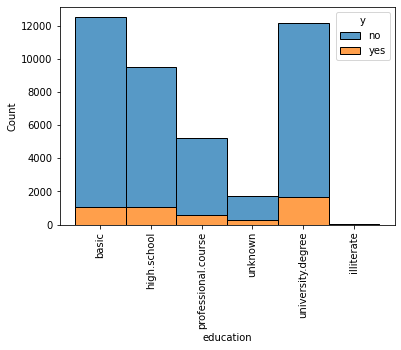

In [15]:
sns.histplot(data=df, x="education", hue="y", multiple="stack")
plt.xticks(rotation=90)
plt.show()

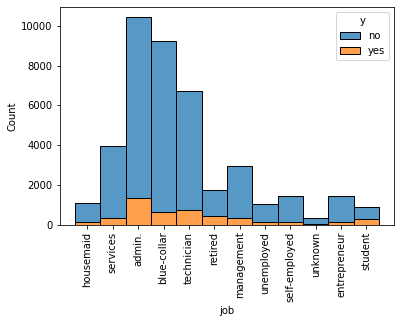

In [16]:
sns.histplot(data=df, x="job", hue="y", multiple="stack")
plt.xticks(rotation=90)
plt.show()

In [17]:
pd.crosstab(df.job, df.education)

education,basic,high.school,illiterate,professional.course,university.degree,unknown
job,,,,,,
admin.,727,3329,1,363,5753,249
blue-collar,7367,878,8,453,94,454
entrepreneur,418,234,2,135,610,57
housemaid,645,174,1,59,139,42
management,351,298,0,89,2063,123
retired,817,276,3,241,285,98
self-employed,338,118,3,168,765,29
services,746,2682,0,218,173,150
student,138,357,0,43,170,167


In [18]:
df['job'][df['age']>60].value_counts()

retired          678
housemaid         54
admin.            47
technician        34
management        30
unknown           21
blue-collar       20
self-employed      9
entrepreneur       8
unemployed         7
services           2
Name: job, dtype: int64

- Inferring education from jobs **: From the cross-tabulation, it can be seen that people with management jobs usually have a university degree. Hence wherever 'job' = management and 'education' = unknown, we can replace 'education' with 'university.degree'. Similarly, 'job' = 'services' --> 'education' = 'high.school' and 'job' = 'housemaid' --> 'education' = 'basic'.

- Inferring jobs from education **: If 'education' = 'basic.4y' or 'basic.6y' or 'basic.9y' then the 'job' is usually 'blue-collar'. If 'education' = 'professional.course', then the 'job' = 'technician'.

- Inferring jobs from age**: As we see, if 'age' > 60, then the 'job' is 'retired,' which makes sense.

While imputing the values for job and education, we were cognizant of the fact that the correlations should make real world sense. If it didn't make real world sense, we didn't replace the missing values.

In [19]:
# age above 60 -> job is retired
df.loc[(df['age']>60) & (df['job']=='unknown'), 'job'] = 'retired'

# inferring education from job
df.loc[(df['education']=='unknown') & (df['job']=='management'), 'education'] = 'university.degree'
df.loc[(df['education']=='unknown') & (df['job']=='services'), 'education'] = 'high.school'
df.loc[(df['education']=='unknown') & (df['job']=='housemaid'), 'education'] = 'basic'
df.loc[(df['education']=='unknown') & (df['job']=='blue-collar'), 'education'] = 'basic'


# inferring job from education
df.loc[(df['job'] == 'unknown') & (df['education']=='basic'), 'job'] = 'blue-collar'
df.loc[(df['job']=='unknown') & (df['education']=='professional.course'), 'job'] = 'technician'

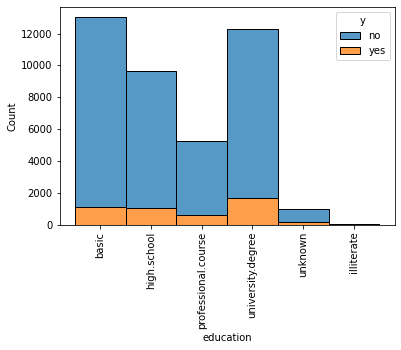

In [20]:
sns.histplot(data=df, x="education", hue="y", multiple="stack")
plt.xticks(rotation=90)
plt.show()

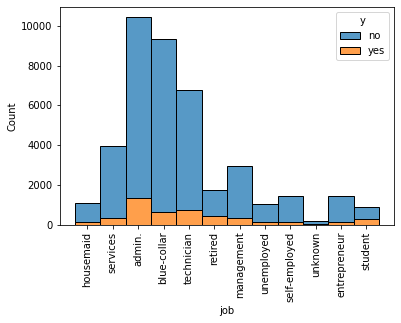

In [21]:
sns.histplot(data=df, x="job", hue="y", multiple="stack")
plt.xticks(rotation=90)
plt.show()

### b) Job & Housing

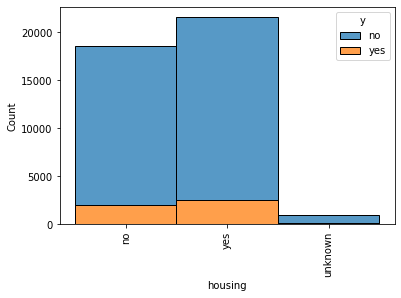

In [22]:
sns.histplot(data=df, x="housing", hue="y", multiple="stack")
plt.xticks(rotation=90)
plt.show()

In [23]:
(pd.crosstab(df.job, df.housing, normalize='index'))* 100

housing,no,unknown,yes
job,,,
admin.,44.482825,2.178085,53.339090
blue-collar,46.627472,2.576162,50.796366
entrepreneur,44.024725,2.472527,53.502747
housemaid,46.320755,2.735849,50.943396
management,46.614227,2.428181,50.957592
retired,45.318782,2.527283,52.153935
self-employed,45.109078,2.814919,52.076003
services,45.804989,2.544722,51.650290
student,43.542857,2.628571,53.828571


### c) Job & Loan

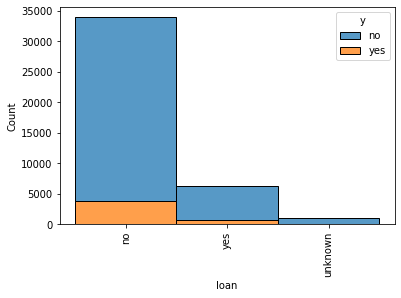

In [24]:
sns.histplot(data=df, x="loan", hue="y", multiple="stack")
plt.xticks(rotation=90)
plt.show()

In [25]:
(pd.crosstab(df.job, df.loan, normalize='index'))* 100

loan,no,unknown,yes
job,,,
admin.,81.414316,2.178085,16.407599
blue-collar,82.629610,2.576162,14.794228
entrepreneur,83.379121,2.472527,14.148352
housemaid,82.735849,2.735849,14.528302
management,82.558140,2.428181,15.013680
retired,83.400345,2.527283,14.072372
self-employed,83.462350,2.814919,13.722730
services,82.312925,2.544722,15.142353
student,81.142857,2.628571,16.228571


In [26]:
df['loan'].replace('unknown', '0', inplace=True)
df['loan'].replace('no', '0', inplace=True)
df['loan'].replace('yes', '1', inplace=True)

### d) Job & Default

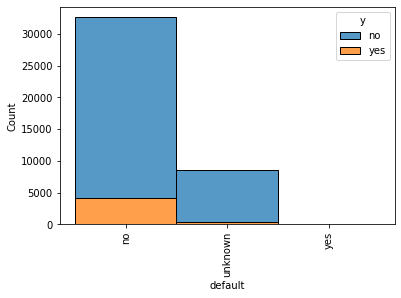

In [27]:
sns.histplot(data=df, x="default", hue="y", multiple="stack")
plt.xticks(rotation=90)
plt.show()

In [28]:
(pd.crosstab(df.job, df.default, normalize='index'))* 100

default,no,unknown,yes
job,,,
admin.,87.593552,12.406448,0.000000
blue-collar,65.718867,34.281133,0.000000
entrepreneur,79.326923,20.673077,0.000000
housemaid,69.905660,30.094340,0.000000
management,84.336525,15.663475,0.000000
retired,77.197013,22.802987,0.000000
self-employed,80.154821,19.845179,0.000000
services,76.921139,23.078861,0.000000
student,88.114286,11.885714,0.000000


In [29]:
df[df['default'] == 'yes']

,age,job,marital,education,default,housing,loan,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
21580,48,technician,married,professional.course,yes,no,0,aug,tue,66,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,no
21581,48,technician,married,professional.course,yes,yes,0,aug,tue,133,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,no
24866,31,unemployed,married,high.school,yes,no,0,nov,tue,111,2,999,1,failure,-0.1,93.200,-42.0,4.153,5195.8,no


In [30]:
df.drop(columns=['default'], inplace=True)

### e) pdays

contacted up to 27 days

<Axes: xlabel='pdays', ylabel='Count'>

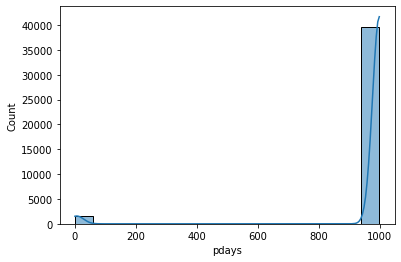

In [31]:
sns.histplot(data =  df, 
             x ="pdays",
             kde = True)

In [32]:
replacement_dict = {999: '0', **dict.fromkeys(range(1, 28), '1')}
df['pdays'] = df['pdays'].replace(replacement_dict)
df['pdays'] = df['pdays'].astype(str)

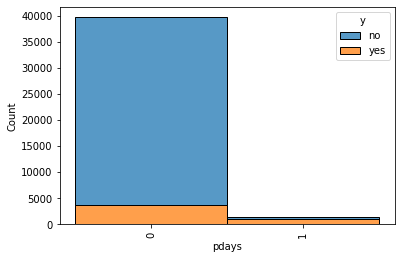

In [33]:
sns.histplot(data=df, x="pdays", hue="y", multiple="stack")
plt.xticks(rotation=90)
plt.show()

### f) poutcome

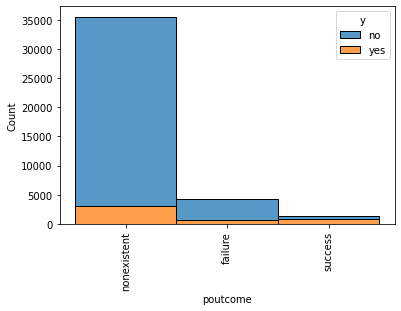

In [34]:
sns.histplot(data=df, x="poutcome", hue="y", multiple="stack")
plt.xticks(rotation=90)
plt.show()

In [35]:
df.drop(columns=['poutcome'], inplace=True)

### g) Marital

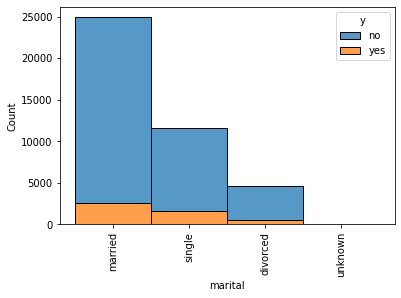

In [36]:
sns.histplot(data=df, x="marital", hue="y", multiple="stack")
plt.xticks(rotation=90)
plt.show()

In [37]:
(df['marital'].value_counts()/ len(df))*100

married     60.522482
single      28.085850
divorced    11.197436
unknown      0.194231
Name: marital, dtype: float64

In [38]:
df['marital'] = df['marital'].replace('unknown', 'other')

# 3. statistical distributions

### a) duration

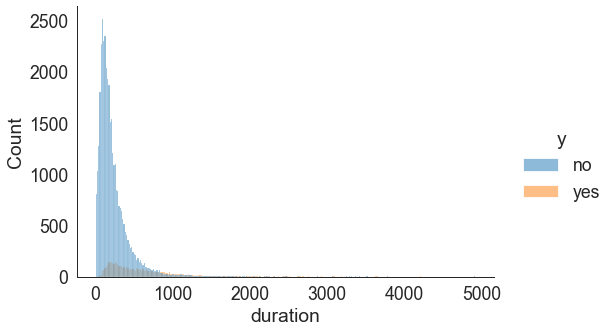

In [39]:
sns.set_style('white')
sns.set_context("paper", font_scale = 2)
sns.displot(data=df, x="duration", kind="hist", bins = 300, aspect = 1.5, hue="y")

Fitting 2 distributions: 100%|██████████| 2/2 [00:00<00:00, 34.18it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
expon,0.000006,3018.910844,-932316.718338,inf,0.106779,0.0
norm,0.000013,11501.816990,-901458.620709,inf,0.169502,0.0


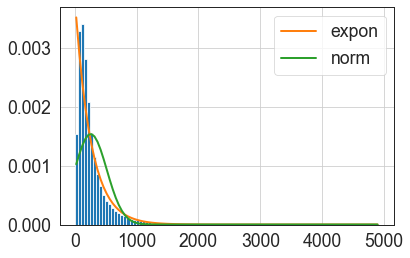

In [40]:
totpym= df["duration"].values
f1 = Fitter(totpym,
           distributions=["norm","expon"])
f1.fit()
f1.summary()

In [41]:
f1.get_best(method = 'sumsquare_error')

{'expon': {'loc': 0.0, 'scale': 258.2850101971448}}

### b) age

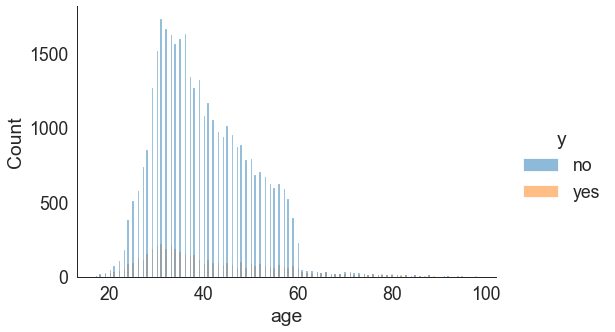

In [42]:
sns.set_style('white')
sns.set_context("paper", font_scale = 2)
sns.displot(data=df, x="age", kind="hist", bins = 300, aspect = 1.5, hue="y")

Fitting 2 distributions: 100%|██████████| 2/2 [00:00<00:00, 31.82it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
norm,0.011914,1441.181975,-620104.65894,inf,0.094439,3.664979e-320
expon,0.028596,983.113842,-584039.99529,inf,0.303829,0.000000e+00


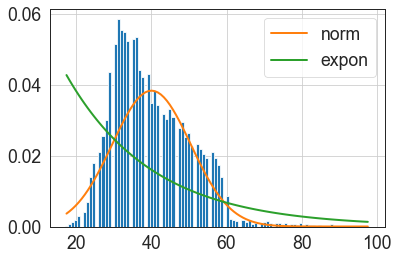

In [43]:
totpym= df["age"].values
f1 = Fitter(totpym,
           distributions=["norm","expon"])
f1.fit()
f1.summary()

In [44]:
f1.get_best(method = 'sumsquare_error')

{'norm': {'loc': 40.02406040594348, 'scale': 10.421123471838731}}

### c) campaign

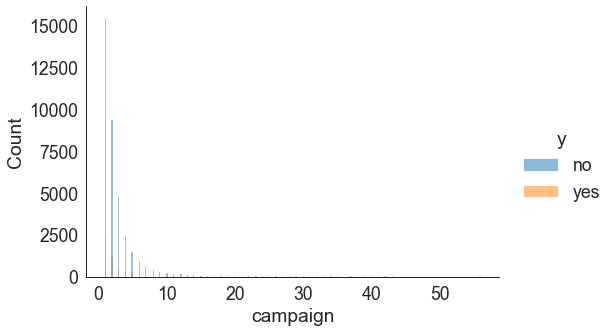

In [45]:
sns.set_style('white')
sns.set_context("paper", font_scale = 2)
sns.displot(data=df, x="campaign", kind="hist", bins = 300, aspect = 1.5, hue="y")

Fitting 2 distributions: 100%|██████████| 2/2 [00:00<00:00, 111.88it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
expon,0.165032,3602.473080,-511843.241219,inf,0.428329,0.0
norm,0.598214,12441.253886,-458801.078529,inf,0.285723,0.0


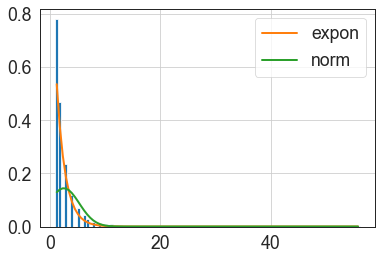

In [46]:
totpym= df["campaign"].values
f1 = Fitter(totpym,
           distributions=["norm","expon"])
f1.fit()
f1.summary()

In [47]:
f1.get_best(method = 'sumsquare_error')

{'expon': {'loc': 1.0, 'scale': 1.567592502670681}}

### d) previous

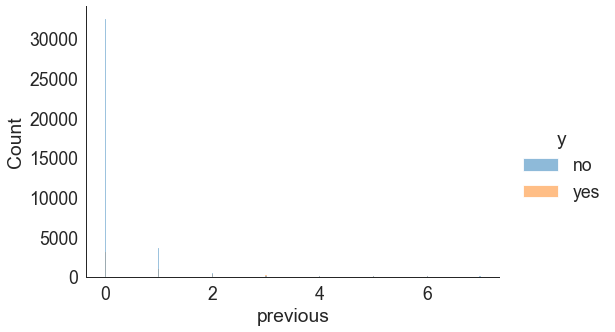

In [48]:
sns.set_style('white')
sns.set_context("paper", font_scale = 2)
sns.displot(data=df, x="previous", kind="hist", bins = 300, aspect = 1.5, hue="y")

Fitting 2 distributions: 100%|██████████| 2/2 [00:00<00:00, 90.28it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
expon,78.362207,3700.172849,-258003.465108,inf,0.863431,0.0
norm,140.610439,6233.627998,-233922.840401,inf,0.500072,0.0


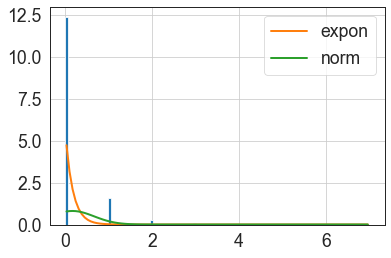

In [49]:
totpym= df["previous"].values
f1 = Fitter(totpym,
           distributions=["norm","expon"])
f1.fit()
f1.summary()

In [50]:
f1.get_best(method = 'sumsquare_error')

{'expon': {'loc': 0.0, 'scale': 0.17296299893172767}}

- emp.var.rate: employment variation rate - quarterly indicator (numeric)
- cons.price.idx: consumer price index - monthly indicator (numeric)     
- cons.conf.idx: consumer confidence index - monthly indicator (numeric)     
- euribor3m: euribor 3 month rate - daily indicator (numeric)
- nr.employed: number of employees - quarterly indicator (numeric)


### e) emp.var.rate

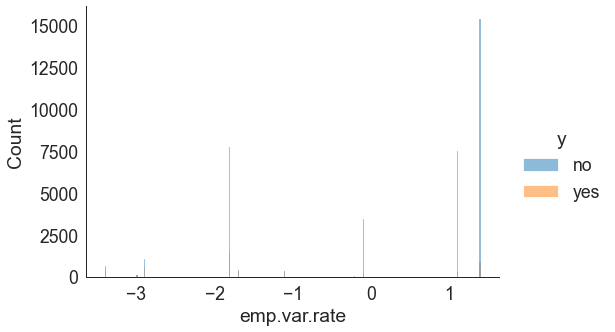

In [51]:
sns.set_style('white')
sns.set_context("paper", font_scale = 2)
sns.displot(data=df, x="emp.var.rate", kind="hist", bins = 300, aspect = 1.5, hue="y")

Fitting 2 distributions: 100%|██████████| 2/2 [00:00<00:00, 53.94it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
norm,105.433241,403.344113,-245781.493917,inf,0.324159,0.0
expon,107.038566,391.371134,-245159.092492,inf,0.308011,0.0


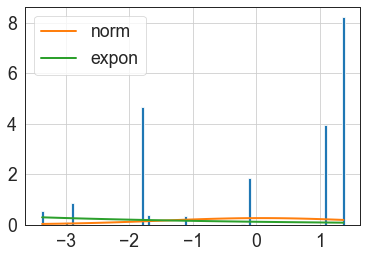

In [52]:
totpym= df["emp.var.rate"].values
f1 = Fitter(totpym,
           distributions=["norm","expon"])
f1.fit()
f1.summary()

In [53]:
f1.get_best(method = 'sumsquare_error')

{'norm': {'loc': 0.08188550063125165, 'scale': 1.5709406698013326}}

### f) cons.price.idx

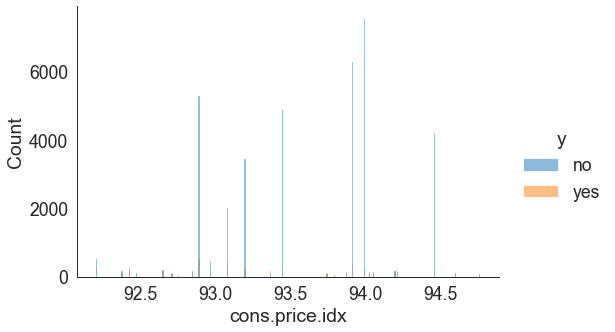

In [54]:
sns.set_style('white')
sns.set_context("paper", font_scale = 2)
sns.displot(data=df, x="cons.price.idx", kind="hist", bins = 300, aspect = 1.5, hue="y")

Fitting 2 distributions: 100%|██████████| 2/2 [00:00<00:00, 43.62it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
norm,166.883657,244.697540,-226867.184449,inf,0.214044,0.0
expon,175.080287,254.305667,-224892.312677,inf,0.335241,0.0


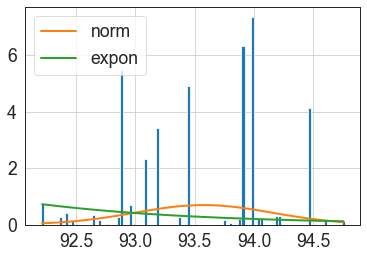

In [55]:
totpym= df["cons.price.idx"].values
f1 = Fitter(totpym,
           distributions=["norm","expon"])
f1.fit()
f1.summary()

In [56]:
f1.get_best(method = 'sumsquare_error')

{'norm': {'loc': 93.5756643682626, 'scale': 0.5788330221069579}}

### g) cons.conf.idx

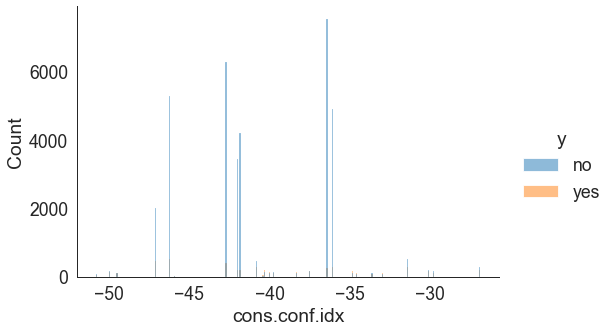

In [57]:
sns.set_style('white')
sns.set_context("paper", font_scale = 2)
sns.displot(data=df, x="cons.conf.idx", kind="hist", bins = 300, aspect = 1.5, hue="y")

Fitting 2 distributions: 100%|██████████| 2/2 [00:00<00:00, 78.96it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
norm,1.884386,729.176199,-411541.607448,inf,0.190261,0.0
expon,1.995067,702.475711,-409190.781590,inf,0.329113,0.0


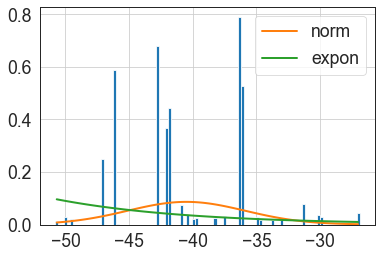

In [58]:
totpym= df["cons.conf.idx"].values
f1 = Fitter(totpym,
           distributions=["norm","expon"])
f1.fit()
f1.summary()

In [59]:
f1.get_best(method = 'sumsquare_error')

{'norm': {'loc': -40.50260027192386, 'scale': 4.6281416720195905}}

### h) euribor3m

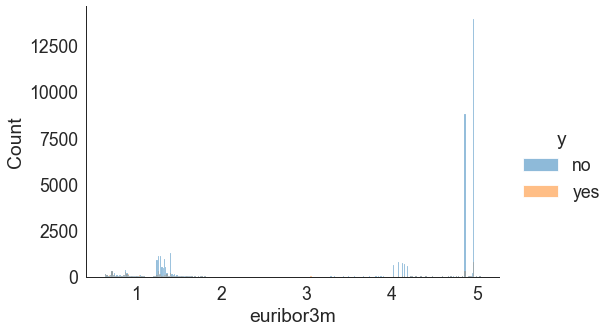

In [60]:
sns.set_style('white')
sns.set_context("paper", font_scale = 2)
sns.displot(data=df, x="euribor3m", kind="hist", bins = 300, aspect = 1.5, hue="y")

Fitting 2 distributions: 100%|██████████| 2/2 [00:00<00:00, 61.60it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
norm,94.122259,372.134175,-250455.648176,inf,0.345485,0.0
expon,94.547537,370.532254,-250269.965301,inf,0.350136,0.0


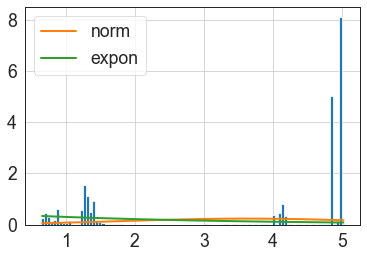

In [61]:
totpym= df["euribor3m"].values
f1 = Fitter(totpym,
           distributions=["norm","expon"])
f1.fit()
f1.summary()

In [62]:
f1.get_best(method = 'sumsquare_error')

{'norm': {'loc': 3.621290812858114, 'scale': 1.7344263494718772}}

### i) nr.employed

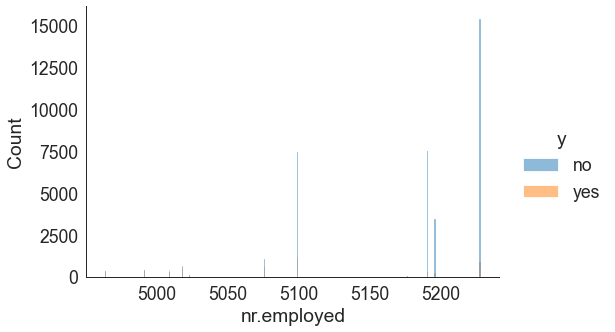

In [63]:
sns.set_style('white')
sns.set_context("paper", font_scale = 2)
sns.displot(data=df, x="nr.employed", kind="hist", bins = 300, aspect = 1.5, hue="y")

Fitting 2 distributions: 100%|██████████| 2/2 [00:00<00:00, 77.12it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
norm,0.033390,1252.562047,-577657.364362,inf,0.301975,0.0
expon,0.034405,1197.086581,-576423.841401,inf,0.365749,0.0


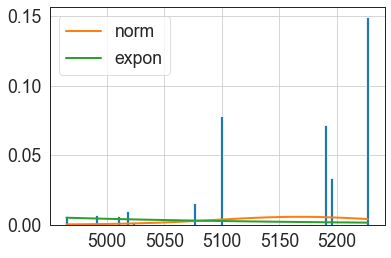

In [64]:
totpym= df["nr.employed"].values
f1 = Fitter(totpym,
           distributions=["norm","expon"])
f1.fit()
f1.summary()

In [65]:
f1.get_best(method = 'sumsquare_error')

{'norm': {'loc': 5167.035910944936, 'scale': 72.25065056854488}}

### EDA

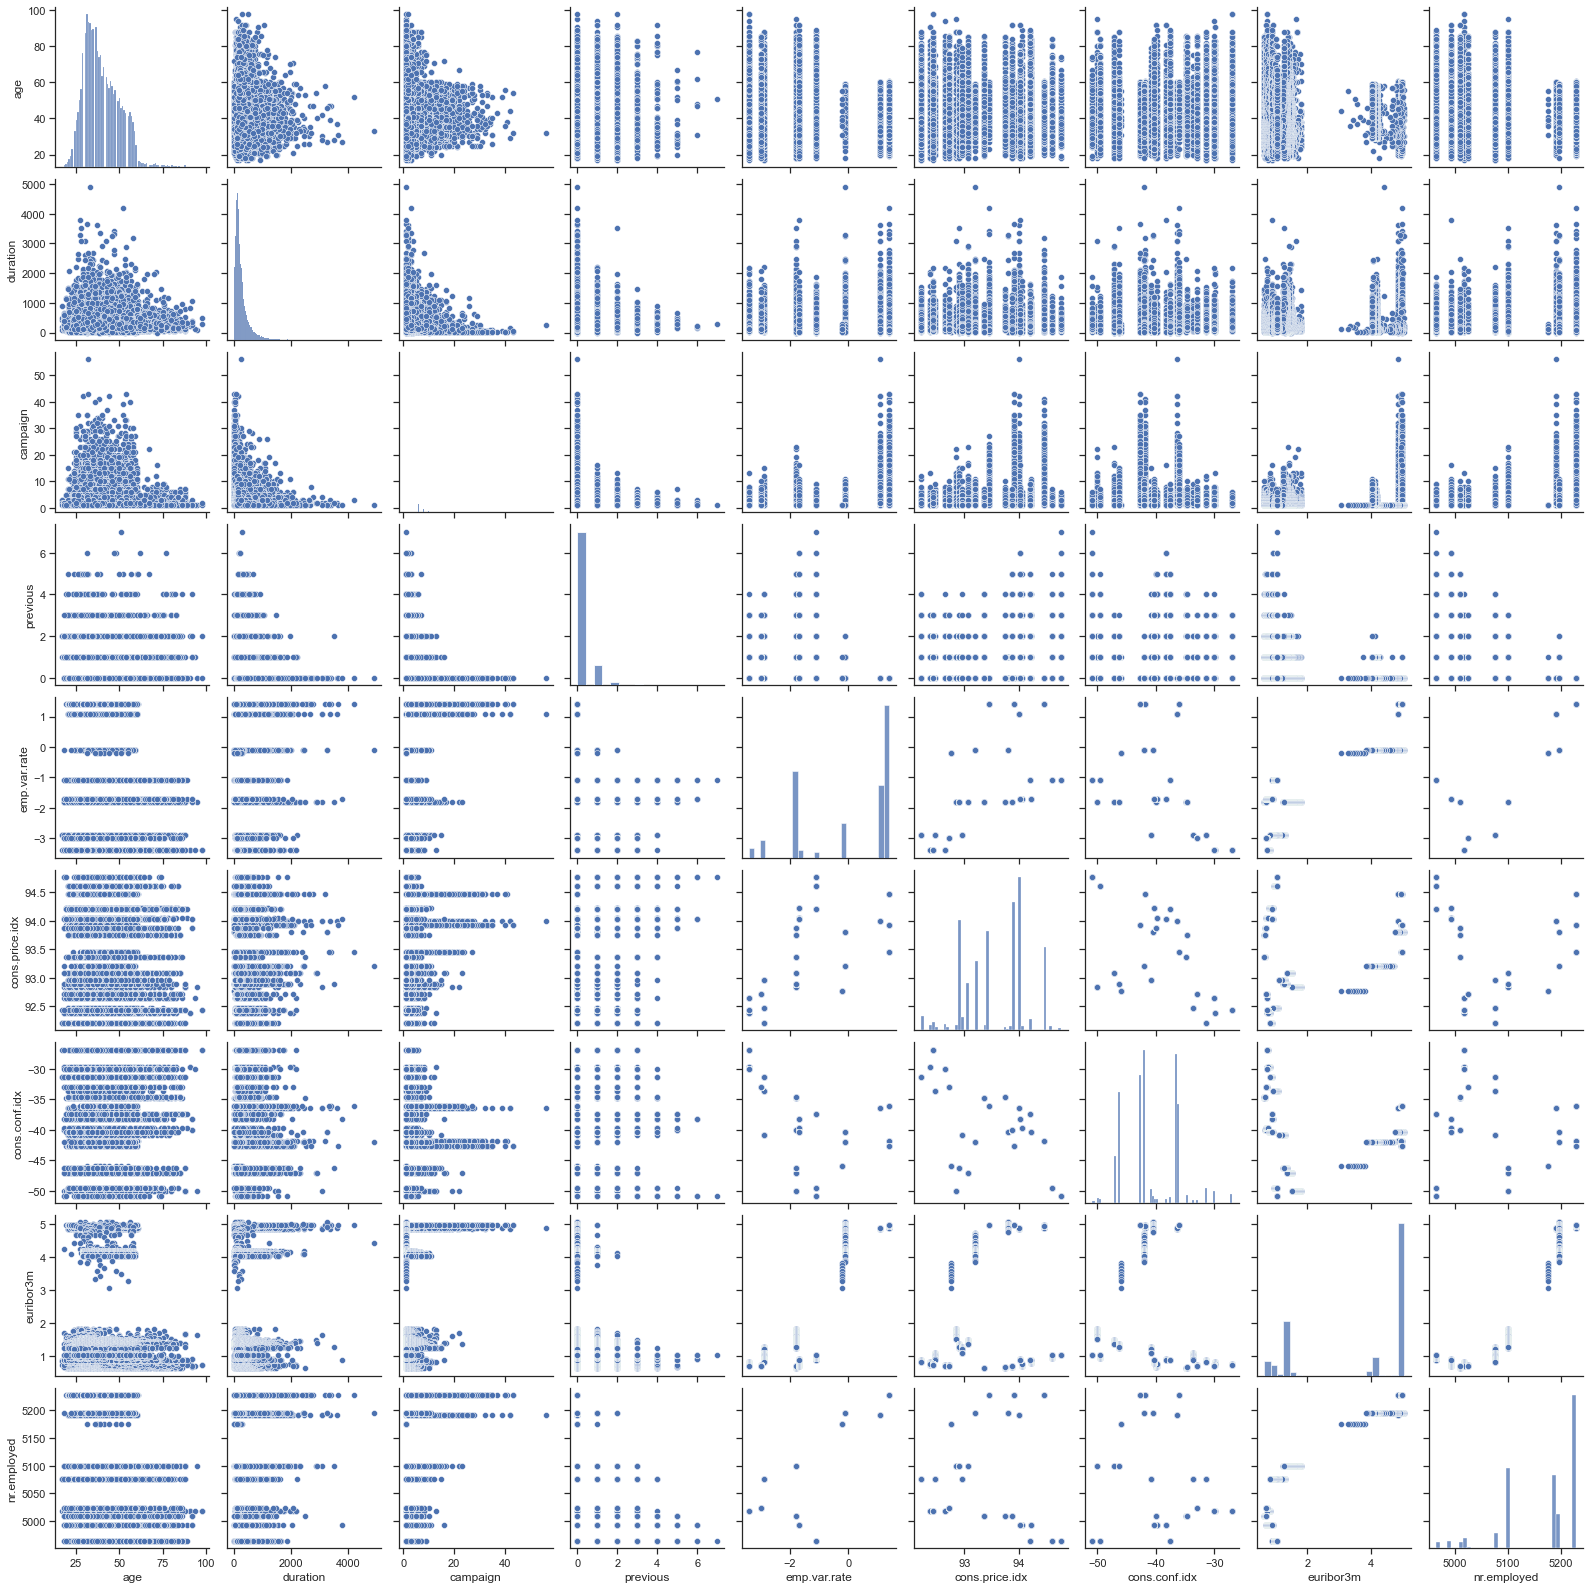

In [66]:
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(df)
plt.show()

<Figure size 432x288 with 0 Axes>

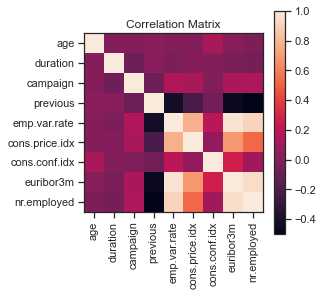

In [67]:
corr = df.corr()
plt.figure()
corrMat = plt.matshow(corr)
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.gca().xaxis.tick_bottom()
plt.colorbar(corrMat)
plt.title(f'Correlation Matrix')
plt.show()

# 4. One hot encoding & scaling

In [68]:
df

,age,job,marital,education,housing,loan,month,day_of_week,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic,no,0,may,mon,261,1,0,0,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,no,0,may,mon,149,1,0,0,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,yes,0,may,mon,226,1,0,0,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic,no,0,may,mon,151,1,0,0,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,1,may,mon,307,1,0,0,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,yes,0,nov,fri,334,1,0,0,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,0,nov,fri,383,1,0,0,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,yes,0,nov,fri,189,2,0,0,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,0,nov,fri,442,1,0,0,-1.1,94.767,-50.8,1.028,4963.6,yes


In [69]:
data = pd.get_dummies(df, columns=['job', 'marital', 'education', 'housing', 'month', 'day_of_week'])

data['y'] = df['y'].replace('no', '0')
data['y'] = data['y'].replace('yes', '1')

In [70]:
scaler = StandardScaler()

data[['age', 'duration', 'previous', 'campaign', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m',
       'nr.employed']] = scaler.fit_transform(df[['age', 'duration', 'previous', 'campaign', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m',
       'nr.employed']])

In [71]:
data

,age,loan,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,...,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed
0,1.533034,0,0.010471,-0.565922,0,-0.349494,0.648092,0.722722,0.886447,0.712460,...,0,1,0,0,0,0,1,0,0,0
1,1.628993,0,-0.421501,-0.565922,0,-0.349494,0.648092,0.722722,0.886447,0.712460,...,0,1,0,0,0,0,1,0,0,0
2,-0.290186,0,-0.124520,-0.565922,0,-0.349494,0.648092,0.722722,0.886447,0.712460,...,0,1,0,0,0,0,1,0,0,0
3,-0.002309,0,-0.413787,-0.565922,0,-0.349494,0.648092,0.722722,0.886447,0.712460,...,0,1,0,0,0,0,1,0,0,0
4,1.533034,1,0.187888,-0.565922,0,-0.349494,0.648092,0.722722,0.886447,0.712460,...,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,3.164336,0,0.292025,-0.565922,0,-0.349494,-0.752343,2.058168,-2.224953,-1.495186,...,0,0,1,0,0,1,0,0,0,0
41184,0.573445,0,0.481012,-0.565922,0,-0.349494,-0.752343,2.058168,-2.224953,-1.495186,...,0,0,1,0,0,1,0,0,0,0
41185,1.533034,0,-0.267225,-0.204909,0,-0.349494,-0.752343,2.058168,-2.224953,-1.495186,...,0,0,1,0,0,1,0,0,0,0
41186,0.381527,0,0.708569,-0.565922,0,-0.349494,-0.752343,2.058168,-2.224953,-1.495186,...,0,0,1,0,0,1,0,0,0,0


In [72]:
X = data.drop(['y'], axis = 1)
y = data['y']

In [73]:
sss=StratifiedShuffleSplit(n_splits=3, random_state=42) 

sss.get_n_splits(X, y)

for train,test in sss.split(X,y):     #this will split the index
    X_train = X.iloc[train]
    y_train = y.iloc[train]
    X_test = X.iloc[test]
    y_test = y.iloc[test]

print('Comparison of category split between Train and Test set')
print()
print('Train target category percentage split')
print()
print(y_train.value_counts(normalize = True))  
print()
print('Test target category percentage split')
print()
print(y_test.value_counts(normalize = True))

Comparison of category split between Train and Test set

Train target category percentage split

0    0.887345
1    0.112655
Name: y, dtype: float64

Test target category percentage split

0    0.887351
1    0.112649
Name: y, dtype: float64


# 5. PCA

In [85]:
pca = PCA(.99) # 95% variance retained

X_train = pca.fit_transform(X_train, y_train)
X_test = pca.transform(X_test)
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

In [86]:
X_train

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
0,-1.349633,-0.125390,0.175654,-0.668809,0.640319,0.017413,-0.262938,1.140362,-0.292282,-0.564262,...,0.101342,-0.127819,0.216157,0.125478,-0.108718,0.006584,-0.050159,0.042361,-0.033519,-0.098580
1,-1.926414,-1.131796,0.441458,-0.457026,-0.192728,0.861411,0.134907,0.690104,0.607831,-1.027584,...,-0.219952,-0.176560,0.226280,-0.009600,0.006584,0.011664,-0.061949,0.068452,-0.053225,-0.048222
2,-1.913739,-1.278631,0.303938,-0.299896,-0.203444,0.858054,-0.250741,1.161257,-0.024289,0.854318,...,-0.220543,-0.002533,-0.002507,-0.018401,-0.051119,-0.032485,-0.045721,0.037636,-0.034819,-0.034958
3,2.897223,0.500993,0.704541,0.704610,-0.953189,0.871567,1.053667,-0.190811,0.304619,0.542860,...,-0.413738,0.607686,0.081320,-0.049378,-0.092304,-0.030292,-0.031469,-0.135532,0.007987,0.006360
4,-1.303637,0.664420,0.163768,-0.695986,-0.134187,0.307288,-0.767505,-0.357759,0.284077,-0.713974,...,-0.004369,0.160256,0.504592,0.165842,-0.298886,-0.014142,-0.035299,0.044260,0.007268,-0.032993
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37064,-1.914511,-0.201197,0.112247,0.468294,-0.646485,0.871272,-0.950681,-0.077498,0.123063,1.179002,...,-0.250991,-0.020384,-0.064119,-0.017769,-0.099127,-0.043287,-0.029783,-0.071041,-0.001526,-0.011286
37065,-1.940041,-0.177984,0.351790,0.212964,-0.715100,0.951067,-0.774046,-0.369570,0.498022,-0.606861,...,-0.300492,0.107780,-0.367911,-0.034779,-0.167523,-0.031234,-0.043136,-0.005835,0.024369,-0.004445
37066,-1.333692,0.468202,-0.255970,-0.159113,0.457030,0.041785,-0.953982,-0.156491,0.053980,-0.551443,...,0.039706,0.158145,-0.380146,0.101130,-0.120562,-0.015109,-0.034554,0.020182,0.018537,0.000530
37067,2.374711,-1.359941,-2.287799,1.267899,0.933651,-1.610924,-0.473262,-0.697008,0.096366,0.587848,...,-0.191913,0.048047,0.050525,-0.194338,-0.108764,-0.025122,-0.017113,-0.020819,-0.060008,0.000599


# 7. SMOTE

In [87]:
smote = SMOTE(sampling_strategy='auto', k_neighbors=1, random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

In [88]:
y_train_SMOTE = pd.DataFrame(y_train_res)
X_train_SMOTE = pd.DataFrame(X_train_res)
X_train_SMOTE

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
0,-1.349633,-0.125390,0.175654,-0.668809,0.640319,0.017413,-0.262938,1.140362,-0.292282,-0.564262,...,0.101342,-0.127819,0.216157,0.125478,-0.108718,0.006584,-0.050159,0.042361,-0.033519,-0.098580
1,-1.926414,-1.131796,0.441458,-0.457026,-0.192728,0.861411,0.134907,0.690104,0.607831,-1.027584,...,-0.219952,-0.176560,0.226280,-0.009600,0.006584,0.011664,-0.061949,0.068452,-0.053225,-0.048222
2,-1.913739,-1.278631,0.303938,-0.299896,-0.203444,0.858054,-0.250741,1.161257,-0.024289,0.854318,...,-0.220543,-0.002533,-0.002507,-0.018401,-0.051119,-0.032485,-0.045721,0.037636,-0.034819,-0.034958
3,2.897223,0.500993,0.704541,0.704610,-0.953189,0.871567,1.053667,-0.190811,0.304619,0.542860,...,-0.413738,0.607686,0.081320,-0.049378,-0.092304,-0.030292,-0.031469,-0.135532,0.007987,0.006360
4,-1.303637,0.664420,0.163768,-0.695986,-0.134187,0.307288,-0.767505,-0.357759,0.284077,-0.713974,...,-0.004369,0.160256,0.504592,0.165842,-0.298886,-0.014142,-0.035299,0.044260,0.007268,-0.032993
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65781,2.754746,-1.230847,-0.428110,1.021978,1.085493,0.315984,1.337868,-0.368170,0.458365,0.226708,...,0.134961,0.106875,-0.126362,0.771653,0.046935,-0.005925,-0.032366,0.023011,-0.041872,0.029310
65782,3.115413,2.629873,-0.400001,0.105150,0.044423,-1.345652,-1.185382,-0.164153,0.393331,0.008593,...,-0.152460,-0.174982,0.136914,-0.075859,0.241336,0.077764,-0.094350,0.595892,-0.264102,-0.129068
65783,4.192167,0.965798,-0.735506,0.970041,3.657068,6.300211,0.034416,-0.153136,-1.631163,-0.389901,...,0.367111,0.131739,0.059411,-0.009272,-0.163286,0.112751,0.286543,-0.049350,-0.049019,-0.073858
65784,2.537251,-0.446246,-0.148034,-0.571330,0.084252,-0.853455,-0.789918,-0.587120,0.553636,-1.083648,...,-0.677292,-0.150044,-0.165504,-0.077358,-0.063940,-0.022818,-0.040946,0.048106,-0.017090,0.010962


In [89]:
y_train_SMOTE.value_counts()

y
1    32893
0    32893
dtype: int64

# 8. Machine Learning

In [83]:
models = []
results = []
names = []

models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('Decison-Tree', DecisionTreeClassifier()))
models.append(('Gaussian', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('RandForest',RandomForestClassifier(max_depth = 8, n_estimators = 120)))
models.append(('ADA', AdaBoostClassifier(n_estimators = 120)))

#### without anything

In [84]:
import warnings
warnings.filterwarnings("ignore")

results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10)
    cv_results = model_selection.cross_val_score(model, X_train_SMOTE, y_train_SMOTE, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "{}: {}".format(name, cv_results.mean())
    print(msg)

LR: 0.9059229660550067
LDA: 0.8847475528496167
KNN: 0.9289556921002825
Decison-Tree: 0.9312801990135007
Gaussian: 0.7673044677059428
SVM: 0.9316904593981856
RandForest: 0.8931722529801398
ADA: 0.9115478060669281


#### with pca

In [90]:
warnings.filterwarnings("ignore")

results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10)
    cv_results = model_selection.cross_val_score(model, X_train_SMOTE, y_train_SMOTE, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "{}: {}".format(name, cv_results.mean())
    print(msg)

LR: 0.8559579063653292
LDA: 0.8302813904639873
KNN: 0.9238788310429303
Decison-Tree: 0.9272361509767089
Gaussian: 0.7769855563259477
SVM: 0.9041775541745803
RandForest: 0.8769214917730948
ADA: 0.8694860777386204


In [93]:
df.to_csv('dm_data.csv', index=False)